<a href="https://colab.research.google.com/github/WestHamster/100DAYSOFML/blob/master/Day-10(eg_Dask_implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
     !pip install -U -q PyDrive ## you will have install for every colab session

     from pydrive.auth import GoogleAuth
     from pydrive.drive import GoogleDrive
     from google.colab import auth
     from oauth2client.client import GoogleCredentials

     # 1. Authenticate and create the PyDrive client.
     auth.authenticate_user()
     gauth = GoogleAuth()
     gauth.credentials = GoogleCredentials.get_application_default()
     drive = GoogleDrive(gauth)


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
from google.colab import files

os.chdir("drive/My Drive/TCS")

In [7]:
ls

automobile2018_12_10_07_59_1803721.txt  Quora_q/     svm_svc.sav
COUNT_PLOT.png                          Result1.csv  Test_09JmpYa.csv
COUNT-PLOT.png                          svm_sme.pkl  Train_psolI3n.csv
d_tree.sav                              svm_sme.sav  usable.csv


In [11]:
import dask.dataframe as dk

df = dk.read_csv('Train_psolI3n.csv')
df.head()

df_test = dk.read_csv('Test_09JmpYa.csv')
df_test.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images
0,EMA00081000168000,1,0.3,2,H,3,42.0,2,873,14.0,0.0
1,EMA00081000187610,1,1.3,2,G,2,32.0,1,630,26.0,11.0
2,EMA00081000244770,2,0.0,1,H,3,21.0,1,988,8.0,2.0
3,EMA00081000245260,1,2.3,1,G,2,25.0,3,339,9.0,5.0
4,EMA00081000264690,1,1.2,2,NaN,2,30.0,2,1157,31.0,14.0


In [63]:
X_t = df_test.iloc[:,1:7]
X_t = X_t.drop(['Customer_Location'],axis=1)
X_t = X_t.dropna()
X_t.compute()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications
0,1,0.3,2,3,42.0
1,1,1.3,2,2,32.0
2,2,0.0,1,3,21.0
3,1,2.3,1,2,25.0
4,1,1.2,2,2,30.0
5,1,0.1,2,3,25.0
6,2,0.3,1,1,0.0
8,1,0.2,2,2,33.0
9,1,0.2,2,3,23.0
10,1,2.4,2,2,17.0


In [53]:
X = df.iloc[:,1:7]
X = X.drop(['Customer_Location'],axis=1)
X = X.dropna()
Y = df.iloc[:,-1]
Y = Y.dropna()
Y = Y.compute()
Y = Y.astype('int')
X = X.compute()
print(X)
print(Y)

       Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0               1                    2.2                  2   
1               2                    2.1                  1   
2               2                    0.1                  1   
3               1                    3.0                  2   
4               1                    0.0                  2   
6               1                    3.2                  1   
7               1                    0.7                  2   
9               2                    0.5                  1   
10              2                    0.2                  1   
11              1                    1.0                  1   
12              2                    0.1                  1   
13              2                    4.0                  1   
14              1                    3.0                  1   
15              2                    1.9                  1   
16              1                    2.1               

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sn

X_train,X_test, Y_train,Y_test = train_test_split(X,Y[:61528],test_size=0.33,random_state=20)


In [66]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train,Y_train)
predict_train = clf.predict(X_test)
print(np.mean(predict_train == Y_test))

0.8014774686037922


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00608715 0.40702442 0.00309655 0.00385959 0.57993228]


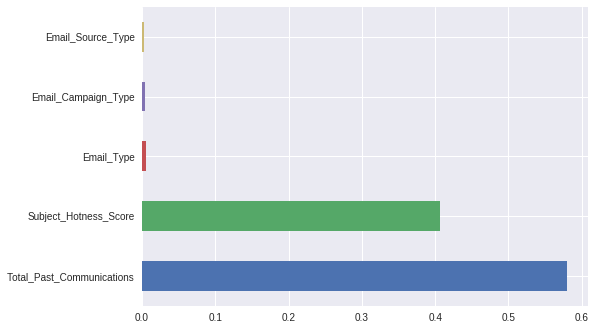

In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


model = ExtraTreesClassifier()
model.fit(X,Y[:61528])
print(model.feature_importances_)

feature_importance = pd.Series(model.feature_importances_, index =X.columns)
feature_importance.nlargest(6).plot(kind='barh')
plt.show()
